In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 
              'sqft_living15':float, 'grade':int, 'yr_renovated':int, 
              'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 
              'sqft_lot15':float, 'sqft_living':float, 'floors':str, 
              'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 
              'id':str, 'sqft_lot':int, 'view':int}

In [3]:
sales = pd.read_csv("./data/kc_house_data.csv", dtype = dtype_dict)

In [4]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


In [5]:
sales.dtypes

id                object
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot           int64
floors            object
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode           object
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object

In [6]:
X_sales = sales[sales.columns.difference(['price'])]
y_sales = sales[['price']]

In [7]:
#X_train, X_test, y_train, y_test = train_test_split(X_sales, y_sales, test_size = 0.2, 
#                                                    random_state = 0, shuffle = False)

training = pd.read_csv("./data/kc_house_train_data.csv", dtype = dtype_dict)
testing = pd.read_csv("./data/kc_house_test_data.csv", dtype = dtype_dict)

X_train = training[training.columns.difference(['price'])]
y_train = training[['price']]

X_test = testing[testing.columns.difference(['price'])]
y_test = testing[['price']]

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17384, 20), (4229, 20), (17384, 1), (4229, 1))

In [9]:
def simple_linear_regression(input_feature, output):
    N = output.size
    sum_y = output.sum()
    sum_X = input_feature.sum()
    Xy = input_feature * output
    sum_Xy = Xy.sum()
    sq_X = input_feature * input_feature
    sum_sq_X = sq_X.sum()
    
    numerator = sum_Xy - np.divide((sum_y * sum_X), N)
    denominator = sum_sq_X - np.divide((sum_X * sum_X), N)
    
    slope = np.divide(numerator, denominator)
    intercept = output.mean() - slope * (input_feature.mean())
         
    return (intercept, slope)

In [10]:
sqft_intercept, sqft_slope = simple_linear_regression(X_train['sqft_living'], y_train['price'])

print("Intercept: {0}".format(sqft_intercept))
print("Slope: {0}".format(sqft_slope))

Intercept: -47116.07907289418
Slope: 281.9588396303426


In [11]:
def get_regression_predictions(input_feature, intercept, slope):
    # calculate the predicted values:
    predicted_values = intercept + slope * input_feature
    return predicted_values

In [12]:
my_house_sqft = 2650
estimated_price = get_regression_predictions(my_house_sqft, sqft_intercept, sqft_slope)
print("The estimated price for a house with {:d} squarefeet is ${:.2f}".format(my_house_sqft, estimated_price))

The estimated price for a house with 2650 squarefeet is $700074.85


In [13]:
def get_residual_sum_of_squares(input_feature, output, intercept, slope):
    predictions = get_regression_predictions(input_feature, intercept, slope)
    residuals = predictions - output
    residuals_sq = residuals * residuals
    RSS = residuals_sq.sum()
    
    return(RSS)

In [14]:
rss_prices_on_sqft = get_residual_sum_of_squares(X_train['sqft_living'], y_train['price'], sqft_intercept, sqft_slope)
print('The RSS of predicting Prices based on Square Feet is : {:e}'.format(rss_prices_on_sqft))

The RSS of predicting Prices based on Square Feet is : 1.201918e+15


In [15]:
def inverse_regression_predictions(output, intercept, slope):
    # solve output = intercept + slope*input_feature for input_feature. Use this equation to compute the inverse predictions:
    estimated_feature = np.divide((output - intercept), slope)
    return estimated_feature

In [16]:
my_house_price = 800000
estimated_squarefeet = inverse_regression_predictions(my_house_price, sqft_intercept, sqft_slope)
print("The estimated squarefeet for a house worth ${:.2f} is {:.0f}".format(my_house_price, estimated_squarefeet))

The estimated squarefeet for a house worth $800000.00 is 3004


In [17]:
bdrm_intercept, bdrm_slope = simple_linear_regression(X_train['bedrooms'], y_train['price'])

print("Intercept: {:.2f}".format(bdrm_intercept))
print("Slope: {:.2f}".format(bdrm_slope))

Intercept: 109473.18
Slope: 127588.95


In [18]:
# Compute RSS when using squarefeet on TEST data:
rss_prices_on_sqft = get_residual_sum_of_squares(X_test['sqft_living'], y_test['price'], sqft_intercept, sqft_slope)
print('The RSS of predicting Prices based on Square Feet is : {:e}'.format(rss_prices_on_sqft))

The RSS of predicting Prices based on Square Feet is : 2.754029e+14


In [19]:
mlr = LinearRegression().fit(X_train[['sqft_living', 'bedrooms', 'bathrooms']],
                y_train['price'])

In [20]:
mlr.coef_, mlr.intercept_

(array([   315.40669062, -65081.88711588,   6942.16598637]), 87912.86581496504)

In [21]:
def get_rss(model, data, outcome):
    predictions = model.predict(data)
    residuals = predictions - outcome
    residuals_sq = residuals * residuals
    RSS = residuals_sq.sum()

    return(RSS)  

In [22]:
rss_train = get_rss(mlr, X_test[['sqft_living', 'bedrooms', 'bathrooms']], y_test['price'])

In [23]:
print("rss on test data: {:e}".format(rss_train))

rss on test data: 2.737619e+14


In [24]:
X_train.loc[:, 'bedrooms_squared'] = X_train['bedrooms'].apply(lambda x: x**2)
X_test.loc[:, 'bedrooms_squared'] = X_test['bedrooms'].apply(lambda x: x**2)

In [25]:
X_train.loc[:, 'bed_bath_rooms'] = X_train['bedrooms'] * X_train['bathrooms']
X_test.loc[:, 'bed_bath_rooms'] = X_test['bedrooms'] * X_test['bathrooms']

In [26]:
X_train.loc[:, 'log_sqft_living'] = X_train['sqft_living'].apply(lambda x: log(x))
X_test.loc[:, 'log_sqft_living'] = X_test['sqft_living'].apply(lambda x: log(x))

In [27]:
X_train.loc[:, 'lat_plus_long'] = X_train['lat'] + X_train['long']
X_test.loc[:, 'lat_plus_long'] = X_test['lat'] + X_test['long']

In [28]:
round(X_test['bedrooms_squared'].mean(), 2), round(X_test['bed_bath_rooms'].mean(), 2), round(X_test['log_sqft_living'].mean(), 2), round(X_test['lat_plus_long'].mean(), 2)

(12.45, 7.5, 7.55, -74.65)

In [29]:
model1_features = ['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long']
model2_features = model1_features + ['bed_bath_rooms']
model3_features = model2_features + ['bedrooms_squared', 'log_sqft_living', 'lat_plus_long']

In [30]:
mlr.model1 = LinearRegression().fit(X_train[model1_features], y_train['price'])
mlr.model2 = LinearRegression().fit(X_train[model2_features], y_train['price'])
mlr.model3 = LinearRegression().fit(X_train[model3_features], y_train['price'])

In [31]:
mlr.model1.coef_, mlr.model1.intercept_

(array([ 3.12258646e+02, -5.95865332e+04,  1.57067421e+04,  6.58619264e+05,
        -3.09374351e+05]), -69075726.79256974)

In [32]:
mlr.model2.coef_, mlr.model2.intercept_

(array([ 3.06610053e+02, -1.13446368e+05, -7.14613083e+04,  6.54844630e+05,
        -2.94298969e+05,  2.55796520e+04]), -66867968.87107877)

In [33]:
mlr.model3.coef_, mlr.model3.intercept_

(array([ 5.29422820e+02,  3.45142296e+04,  6.70607813e+04,  5.34085611e+05,
        -4.06750711e+05, -8.57050439e+03, -6.78858667e+03, -5.61831484e+05,
         1.27334900e+05]), -62036084.986098304)

In [34]:
rss_model_1 = get_rss(mlr.model1, X_train[model1_features], y_train['price'])
print("rss model1: {:e}".format(rss_model_1))

rss model1: 9.678800e+14


In [35]:
rss_model_2 = get_rss(mlr.model2, X_train[model2_features], y_train['price'])
print("rss model1: {:e}".format(rss_model_2))

rss model1: 9.584196e+14


In [36]:
rss_model_3 = get_rss(mlr.model3, X_train[model3_features], y_train['price'])
print("rss model1: {:e}".format(rss_model_3))

rss model1: 9.034365e+14


In [37]:
rss_model_1_test = get_rss(mlr.model1, X_test[model1_features], y_test['price'])
print("rss model1: {:e}".format(rss_model_1_test))

rss model1: 2.255005e+14


In [38]:
rss_model_2_test = get_rss(mlr.model2, X_test[model2_features], y_test['price'])
print("rss model2: {:e}".format(rss_model_2_test))

rss model2: 2.233775e+14


In [39]:
rss_model_3_test = get_rss(mlr.model3, X_test[model3_features], y_test['price'])
print("rss model3: {:e}".format(rss_model_3_test))

rss model3: 2.592363e+14


why is test error less than train error?

In [40]:
def predict_output(feature_matrix, weights):
    predictions = np.dot(feature_matrix, weights)
    return(predictions)

In [41]:
def feature_derivative(errors, feature):
    # Assume that errors and feature are both numpy arrays of the same length (number of data points)
    # compute twice the dot product of these vectors as 'derivative' and return the value
    derivative = 2 * np.dot(errors, feature)
    return(derivative)

In [42]:
def regression_gradient_descent(feature_matrix, output, initial_weights, step_size, tolerance):
    converged = False 
    weights = np.array(initial_weights) # make sure it's a numpy array
    while not converged:
        predictions = predict_output(feature_matrix, weights)
        errors = predictions - output
        gradient_sum_squares = 0 
        
        for i in range(len(weights)): # loop over each weight
            derivative = feature_derivative(errors, feature_matrix[:, i])
            gradient_sum_squares = (derivative * derivative) + gradient_sum_squares
            weights[i] = weights[i] - (step_size * derivative)            
        gradient_magnitude = sqrt(gradient_sum_squares)

        if gradient_magnitude < tolerance:
            converged = True
    return(weights)

In [43]:
simple_features = ['sqft_living']
my_output = 'price'
simple_feature_matrix = np.c_[np.ones(X_train.shape[0]), X_train[simple_features].values] #add constant term
output = y_train[my_output].values
initial_weights = np.array([-47000., 1.])
step_size = 7e-12
tolerance = 2.5e7

In [44]:
model_gd = regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, tolerance)
model_gd

array([-46999.88716555,    281.91211918])

In [45]:
round(model_gd[1], 1)

281.9

In [46]:
test_simple_feature_matrix = np.c_[np.ones(X_test.shape[0]), X_test[simple_features].values]
test_output = y_test[my_output].values

In [47]:
test_simple_feature_matrix.shape, test_output.shape

((4229, 2), (4229,))

In [48]:
test_predictions = predict_output(test_simple_feature_matrix, model_gd) 

In [49]:
errors = test_predictions - test_output
rss_test = np.dot(errors, errors)
print("test rss: {:e}".format(rss_test))

test rss: 2.754000e+14


In [50]:
multiple_features = ['sqft_living', 'sqft_living15']
mult_output = 'price'

mult_feature_matrix = np.c_[np.ones(X_train.shape[0]), X_train[multiple_features].values] #add constant term
output = y_train[mult_output].values

initial_weights = np.array([-100000., 1., 1.])
step_size = 4e-12
tolerance = 1e9

In [51]:
mult_rgd = regression_gradient_descent(mult_feature_matrix, output, initial_weights, step_size, tolerance)

In [52]:
mult_rgd

array([-9.99999688e+04,  2.45072603e+02,  6.52795267e+01])

In [53]:
test_mult_feature_matrix = np.c_[np.ones(X_test.shape[0]), X_test[multiple_features].values]
test_mult_output = y_test[mult_output].values

In [54]:
test_mult_predictions = predict_output(test_mult_feature_matrix, mult_rgd)

In [55]:
test_errors = test_mult_predictions - test_mult_output
rss_mult_test = np.dot(test_errors, test_errors)
print("test mult rss: {:e}".format(rss_mult_test))

test mult rss: 2.702634e+14


In [56]:
rss_test > rss_mult_test

True

In [57]:
sales = sales.sort_values(['sqft_living', 'price'])

In [58]:
poly1 = PolynomialFeatures(degree = 1)
poly1_data = poly1.fit_transform(sales[['sqft_living']])

In [59]:
poly1_data

array([[1.000e+00, 2.900e+02],
       [1.000e+00, 3.700e+02],
       [1.000e+00, 3.800e+02],
       ...,
       [1.000e+00, 1.004e+04],
       [1.000e+00, 1.205e+04],
       [1.000e+00, 1.354e+04]])

In [60]:
poly1_r = LinearRegression().fit(poly1_data, sales['price'])

In [62]:
poly1_r.coef_, poly1_r.intercept_

(array([  0.       , 280.6235679]), -43580.74309447361)

In [63]:
poly1_data[:,1]

array([  290.,   370.,   380., ..., 10040., 12050., 13540.])

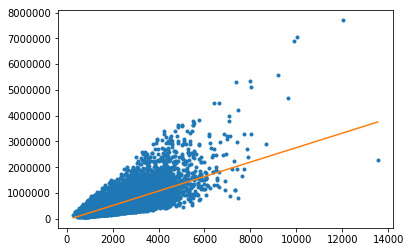

In [64]:
plt.plot(poly1_data[:, 1], sales['price'],'.',
        poly1_data[:, 1], poly1_r.predict(poly1_data),'-')

In [65]:
poly2 = PolynomialFeatures(degree = 2)
poly2_data = poly2.fit_transform(sales[['sqft_living']])
poly2_r = LinearRegression().fit(poly2_data, sales['price'])
poly2_r.coef_, poly2_r.intercept_

(array([0.00000000e+00, 6.79940947e+01, 3.85812609e-02]), 199222.27930564433)

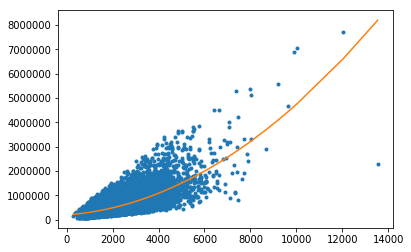

In [66]:
plt.plot(poly2_data[:, 1], sales['price'],'.',
        poly2_data[:, 1], poly2_r.predict(poly2_data),'-')

In [67]:
from sklearn.pipeline import Pipeline # using a pipeline

model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
model = model.fit(sales[['sqft_living']], sales['price'])
model.named_steps['linear'].coef_

array([ 0.00000000e+00, -9.01819864e+01,  8.70465088e-02, -3.84055259e-06])

In [68]:
poly3 = PolynomialFeatures(degree = 3)
poly3_data = poly3.fit_transform(sales[['sqft_living']])
poly3_r = LinearRegression().fit(poly3_data, sales['price'])
poly3_r.coef_, poly3_r.intercept_

(array([ 0.00000000e+00, -9.01819864e+01,  8.70465088e-02, -3.84055259e-06]),
 336819.7482679542)

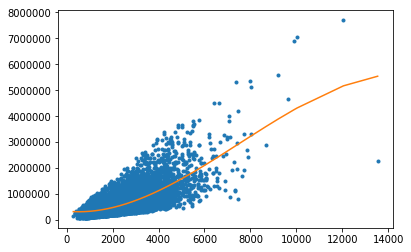

In [69]:
plt.plot(poly3_data[:, 1], sales['price'],'.',
        poly3_data[:, 1], poly3_r.predict(poly3_data),'-')

In [70]:
poly15 = PolynomialFeatures(degree = 15)
poly15_data = poly15.fit_transform(sales[['sqft_living']])
poly15_r = LinearRegression().fit(poly15_data, sales['price'])
poly15_r.coef_, poly15_r.intercept_

(array([ 0.00000000e+00,  1.38184378e-50,  1.02680916e-55,  2.48920611e-60,
         6.46712511e-78,  3.14372684e-75,  2.68575522e-71,  2.26147568e-67,
         1.85900299e-63,  1.47144116e-59,  1.09771012e-55,  7.43509038e-52,
         4.23015578e-48,  1.61618577e-44, -2.49283826e-48,  9.59718336e-53]),
 537116.3296377152)

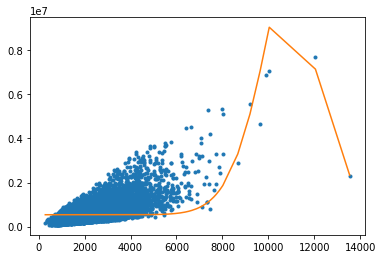

In [71]:
plt.plot(poly15_data[:, 1], sales['price'],'.',
        poly15_data[:, 1], poly15_r.predict(poly15_data),'-')

In [72]:
set1 = pd.read_csv("./data/wk3_kc_house_set_1_data.csv", dtype = dtype_dict)
set2 = pd.read_csv("./data/wk3_kc_house_set_2_data.csv", dtype = dtype_dict)
set3 = pd.read_csv("./data/wk3_kc_house_set_3_data.csv", dtype = dtype_dict)
set4 = pd.read_csv("./data/wk3_kc_house_set_4_data.csv", dtype = dtype_dict)

In [73]:
def poly15_models(sales):
    
    poly15 = PolynomialFeatures(degree = 15)
    poly15_data = poly15.fit_transform(sales[['sqft_living']])
    poly15_r = LinearRegression().fit(poly15_data, sales['price'])
    print("Coefficients: {}".format(poly15_r.coef_))
    print("Intercept: {}".format(poly15_r.intercept_))
    
    plt.plot(poly15_data[:, 1], sales['price'],'.',
        poly15_data[:, 1], poly15_r.predict(poly15_data),'-')
    
    plt.show()
    plt.clf()

Coefficients: [ 0.00000000e+00  6.33540315e-50 -2.03745288e-56  1.72116306e-91
  1.33208608e-77  1.43630527e-74  1.10358333e-70  8.37724029e-67
  6.23411957e-63  4.49156442e-59  3.06938763e-55  1.91749300e-51
  1.01335180e-47  3.62176959e-44 -5.63501661e-48  2.18641116e-52]
Intercept: 539058.8186677867


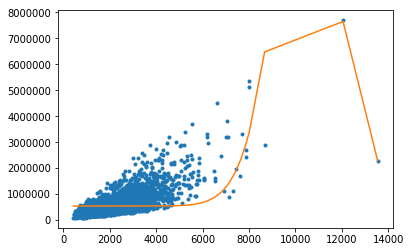

<Figure size 432x288 with 0 Axes>

In [74]:
poly15_models(set1)

Coefficients: [ 0.00000000e+00  3.40105702e-39  3.47414634e-44  2.86331991e-50
  3.30319658e-74  6.14409047e-62  8.23283038e-59  3.62352454e-55
  1.49599410e-51  5.73163831e-48  1.94877552e-44  5.37108690e-41
  9.36636464e-38 -3.61949030e-41  4.63300802e-45 -1.96221126e-49]
Intercept: 506909.3894831238


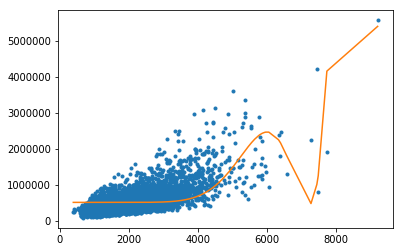

<Figure size 432x288 with 0 Axes>

In [75]:
poly15_models(set2)

Coefficients: [ 0.00000000e+00  5.94972747e-49 -1.11795144e-54  3.14856579e-88
  7.30952961e-76  6.72328695e-73  4.27894908e-69  2.68009626e-65
  1.63911362e-61  9.66435015e-58  5.38044653e-54  2.72563636e-50
  1.16253248e-46  3.33756141e-43 -6.76238818e-47  3.43132932e-51]
Intercept: 530874.3166533592


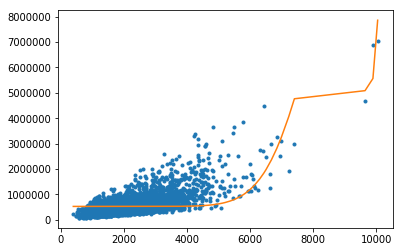

<Figure size 432x288 with 0 Axes>

In [76]:
poly15_models(set3)

Coefficients: [ 0.00000000e+00  3.39050009e-39 -9.39120287e-45 -5.59211864e-50
  1.69259671e-73  2.25351932e-61  3.13653138e-58  1.27123514e-54
  4.88047059e-51  1.73604391e-47  5.47212235e-44  1.39622551e-40
  2.25092472e-37 -9.44166791e-41  1.31602795e-44 -6.09301610e-49]
Intercept: 494810.0345691459


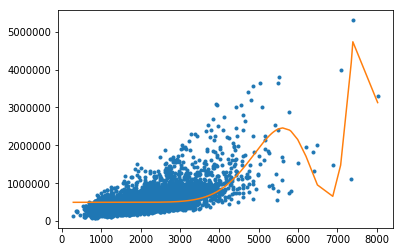

<Figure size 432x288 with 0 Axes>

In [77]:
poly15_models(set4)

In [78]:
training = pd.read_csv("./data/wk3_kc_house_train_data.csv", dtype = dtype_dict)
validation = pd.read_csv("./data/wk3_kc_house_valid_data.csv", dtype = dtype_dict)
testing = pd.read_csv("./data/wk3_kc_house_test_data.csv", dtype = dtype_dict)

In [79]:
training.shape, validation.shape, testing.shape

((9761, 21), (9635, 21), (2217, 21))

In [80]:
def calc_rss(data, output, model):
    residuals = output - model.predict(data)
    rss = (residuals * residuals).sum()
    return rss

In [81]:
rss = list()

for power in range(1, 15+1):
    
    poly15 = PolynomialFeatures(degree = power)
    poly15_data = poly15.fit_transform(training[['sqft_living']])
    poly15_r = LinearRegression().fit(poly15_data, training['price'])

    validation_data = PolynomialFeatures(degree = power)
    validation15_data = validation_data.fit_transform(validation[['sqft_living']])
    
    rss.append(calc_rss(validation15_data, validation['price'], poly15_r))

In [82]:
rss

[629097886299585.5,
 623955062706517.8,
 625820280237056.5,
 629987341492119.1,
 628247484251984.8,
 566268541131185.8,
 1073846247428393.4,
 7087999013199630.0,
 4.530215256317489e+16,
 2.4753418402465597e+17,
 1.1954397554324467e+18,
 5.198565714943959e+18,
 7.616230021199416e+17,
 2.2975609251223862e+18,
 6.955038097699055e+18]

In [83]:
print("degree with lowest RSS: {0}, rss = {1}".format(np.argmin(rss) + 1, np.min(rss)))

degree with lowest RSS: 6, rss = 566268541131185.8


In [84]:
power = 6

poly6 = PolynomialFeatures(degree = power)
poly_data = poly6.fit_transform(training[['sqft_living']])
poly_r = LinearRegression().fit(poly_data, training['price'])
poly_r.coef_, poly_r.intercept_


(array([ 0.00000000e+00,  1.99363169e-08,  2.44826283e-08,  3.79412496e-05,
        -9.89793412e-09,  1.06074595e-12, -3.90873908e-17]),
 297506.78714612906)

In [85]:
testing_data = PolynomialFeatures(degree = power)
testing6_data = testing_data.fit_transform(testing[['sqft_living']])

rss_test = calc_rss(testing6_data, testing['price'], poly_r)
rss_test
print("{:.2e}".format(rss_test))

1.35e+14
